# Preliminary Draft

I love watching TV series and movies, most recently Ted Lasso seems to be the talk of the town. I loved the first season and can't wait to watch the second season. I also have an interest in the Emmy's, I watch it every year. The reason for this analysis is to determine if Twitter has any influence on the Emmy winner of Best Comedy Series. I first pulled Tweets that mention Ted Lasso or #tedlasso along with blackish or #blackish. Once i got a reasonable amount of Tweets i used the VADER toolkit(?) to determine the positive and negative sentiments of the Tweets that i pulled. Using VADER i can measure the sentiment of the Tweets to then compare the two shows. Once i got the sentiments of each show i created a histogram of the negative, positive, neutral, and compound of the tweets. This allowed me to get a visual of each sentiment and see which had more weight to it. Looking at these graphs comparatively, i can estimate that Ted Lasso has more positive Tweets than blackish. This has some limitations to it because I am just guessing by looking at the graphs, that Ted Lasso is more positive. If someone else were to look at the graphs they might say that blackish is more positive. Right now it is pretty bias to say that Ted Lasso is more positive. Another limitation i ran into was that I only have 200 Tweets for each show, I think collecting more Tweets would help for my analysis. For my final project i hope to get the average of each sentiment (positive, negative, and neutral), and then compare the two. I also plan on doing a T test with the two shows. Overall, I want to positively say that Ted Lasso won the Emmy for best comedy series by showing it with numbers.
(More info at the bottom)

In [1]:
import requests
import pandas as pd
import urllib
import json

In [2]:
bearer_token = pd.read_csv('bearer_token.txt', header = 0)

In [ ]:
bearer_token

In [ ]:
bearer_token['bearer_token'].iloc[0]

In [5]:
header = {'Authorization' : 'Bearer {}'.format(bearer_token['bearer_token'].iloc[0])}

In [6]:
bearer_token.keys()

Index(['bearer_token'], dtype='object')

In [7]:
endpoint_url = 'https://api.twitter.com/2/tweets/search/recent'

In [8]:
query = urllib.parse.quote('(#TedLasso OR Ted Lasso lang:en)')

In [9]:
query

'%28%23TedLasso%20OR%20Ted%20Lasso%20lang%3Aen%29'

In [10]:
my_api_url = endpoint_url + '?query={}'.format(query)

In [11]:
my_api_url

'https://api.twitter.com/2/tweets/search/recent?query=%28%23TedLasso%20OR%20Ted%20Lasso%20lang%3Aen%29'

In [12]:
tweet_fields = 'public_metrics,created_at,author_id,lang'

In [13]:
my_api_url = endpoint_url + '?query={}&tweet.fields={}'.format(query, tweet_fields)

In [14]:
my_api_url

'https://api.twitter.com/2/tweets/search/recent?query=%28%23TedLasso%20OR%20Ted%20Lasso%20lang%3Aen%29&tweet.fields=public_metrics,created_at,author_id,lang'

In [15]:
expansions = 'author_id'

In [16]:
url = endpoint_url + '?query={}&max_results=10&tweet.fields{}'.format(query, tweet_fields)

In [17]:
response = requests.request("GET", url, headers = header)

In [18]:
url_expansions = endpoint_url + '?query={}&max_results=100&tweet.fields={}&expansions={}&user.fields={}'.format(query, tweet_fields, expansions, 'username')

In [19]:
url_expansions

'https://api.twitter.com/2/tweets/search/recent?query=%28%23TedLasso%20OR%20Ted%20Lasso%20lang%3Aen%29&max_results=100&tweet.fields=public_metrics,created_at,author_id,lang&expansions=author_id&user.fields=username'

In [20]:
first_response = requests.request("GET", url_expansions, headers = header)

In [ ]:
first_response.text

In [22]:
first_dict = json.loads(first_response.text)

In [23]:
first_dict.keys()

dict_keys(['data', 'includes', 'meta'])

In [24]:
my_df = pd.DataFrame(first_dict['data'])

In [ ]:
my_df

In [26]:
first_dict['meta']

{'newest_id': '1469084140083593219',
 'oldest_id': '1469067031039254531',
 'result_count': 100,
 'next_token': 'b26v89c19zqg8o3fpdy9ckgtz6dmuz5ilcsmdqwafkv3x'}

In [27]:
my_api_url2 = my_api_url + '&next_token={}&max_results=100'.format(first_dict['meta']['next_token'])

In [28]:
second_response = requests.request("GET", my_api_url2, headers = header)

In [ ]:
second_response.text

In [30]:
my_df = my_df.append(pd.DataFrame(json.loads(second_response.text)['data']), ignore_index= True)

In [ ]:
my_df

In [38]:
my_df.to_csv('tedLassoAnalysis.csv')

In [39]:
lasso = pd.read_csv('tedLassoAnalysis.csv', encoding = 'utf-8')

In [40]:
lasso.keys()

Index(['Unnamed: 0', 'lang', 'public_metrics', 'id', 'text', 'author_id',
       'created_at'],
      dtype='object')

In [ ]:
lasso['lang'].astype('category')

In [43]:
lasso_posts = lasso[(lasso['lang']) == 'en']

In [ ]:
lasso_posts['lang'].astype('category')

In [ ]:
lasso_posts['text']

In [ ]:
lasso_posts['text'].iloc[0]

In [ ]:
lasso_posts['text'].iloc[0].lower()

In [48]:
lowercase = [x.lower() for x in lasso_posts['text']]

In [ ]:
lowercase[0]

In [50]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [51]:
analyze= SentimentIntensityAnalyzer()

In [52]:
print(analyze.polarity_scores(lasso_posts['text'].iloc[3]))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [53]:
senti = analyze.polarity_scores(lasso_posts['text'].iloc[3])

In [54]:
senti['neu']

1.0

In [55]:
all_sents = [analyze.polarity_scores(x) for x in lasso_posts['text']]

In [ ]:
all_sents

In [57]:
sents_df = pd.DataFrame(all_sents)

In [ ]:
sents_df

In [59]:
sents_df['pos'].describe()

count    195.000000
mean       0.150621
std        0.144459
min        0.000000
25%        0.000000
50%        0.134000
75%        0.270000
max        0.535000
Name: pos, dtype: float64

In [60]:
from matplotlib import pyplot as plt

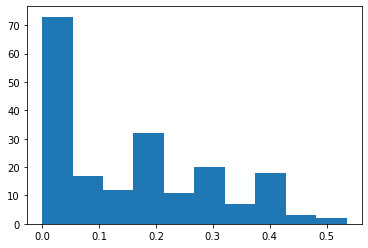

In [61]:
fig0, ax0 = plt.subplots()
ax0.hist(sents_df['pos'])
plt.show()

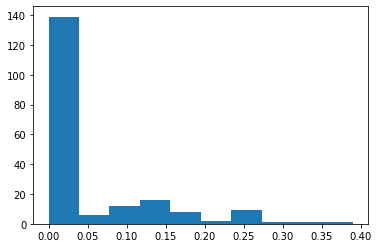

In [62]:
fig1, ax1 = plt.subplots()
ax1.hist(sents_df['neg'])
plt.show()

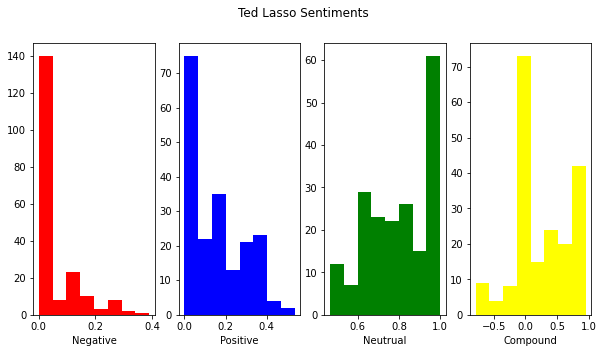

In [133]:
fig4, ax4 = plt.subplots(1, 4, figsize = (10, 5))
ax4[0].hist(sents_df['neg'], bins =  8, color = 'red')
ax4[1].hist(sents_df['pos'], bins =  8, color = 'blue')
ax4[2].hist(sents_df['neu'], bins =  8, color = 'green')
ax4[3].hist(sents_df['compound'], bins =  8, color = 'yellow')

ax4[0].set_xlabel("Negative")
ax4[1].set_xlabel("Positive")
ax4[2].set_xlabel("Neutrual")
ax4[3].set_xlabel("Compound")

fig4.suptitle("Ted Lasso Sentiments")
plt.show()

In [63]:
endpoint_url2 = 'https://api.twitter.com/2/tweets/search/recent'

In [64]:
query2 = urllib.parse.quote('(#blackish OR blackish lang:en)')

In [65]:
query2

'%28%23blackish%20OR%20blackish%20lang%3Aen%29'

In [66]:
my_api_url3 = endpoint_url2 + '?query={}'.format(query2)

In [67]:
my_api_url3

'https://api.twitter.com/2/tweets/search/recent?query=%28%23blackish%20OR%20blackish%20lang%3Aen%29'

In [68]:
tweet_fields2 = 'public_metrics,created_at,author_id,lang'

In [69]:
my_api_url2 = endpoint_url2 + '?query={}&tweet.fields={}'.format(query2, tweet_fields2)

In [70]:
my_api_url2

'https://api.twitter.com/2/tweets/search/recent?query=%28%23blackish%20OR%20blackish%20lang%3Aen%29&tweet.fields=public_metrics,created_at,author_id,lang'

In [71]:
expansions2 = 'author_id'

In [72]:
url2 = endpoint_url2 + '?query={}&max_results=10&tweet.fields{}'.format(query2, tweet_fields2)

In [73]:
response2 = requests.request("GET", url, headers = header)

In [74]:
url_expansions2 = endpoint_url2 + '?query={}&max_results=100&tweet.fields={}&expansions={}&user.fields={}'.format(query2, tweet_fields2, expansions2, 'username')

In [75]:
url_expansions2

'https://api.twitter.com/2/tweets/search/recent?query=%28%23blackish%20OR%20blackish%20lang%3Aen%29&max_results=100&tweet.fields=public_metrics,created_at,author_id,lang&expansions=author_id&user.fields=username'

In [76]:
blackish_response = requests.request("GET", url_expansions2, headers = header)

In [ ]:
blackish_response.text

In [78]:
blackish_dict = json.loads(blackish_response.text)

In [79]:
blackish_dict.keys()

dict_keys(['data', 'includes', 'meta'])

In [80]:
blackish_df = pd.DataFrame(blackish_dict['data'])

In [ ]:
blackish_df

In [82]:
blackish_dict['meta']

{'newest_id': '1469073424936890369',
 'oldest_id': '1468685144928231440',
 'result_count': 100,
 'next_token': 'b26v89c19zqg8o3fpdy8xrnufxv3hhp4ve5bl32hlfr7h'}

In [83]:
my_api_url4 = my_api_url2 + '&next_token={}&max_results=100'.format(blackish_dict['meta']['next_token'])

In [84]:
my_api_url4

'https://api.twitter.com/2/tweets/search/recent?query=%28%23blackish%20OR%20blackish%20lang%3Aen%29&tweet.fields=public_metrics,created_at,author_id,lang&next_token=b26v89c19zqg8o3fpdy8xrnufxv3hhp4ve5bl32hlfr7h&max_results=100'

In [85]:
blackish2_response = requests.request("GET", my_api_url4, headers = header)

In [ ]:
blackish2_response.text

In [87]:
blackish_df = blackish_df.append(pd.DataFrame(json.loads(blackish2_response.text)['data']), ignore_index= True)

In [ ]:
blackish_df

In [89]:
blackish_df.to_csv('blackishAnalysis.csv')

In [90]:
blackish = pd.read_csv('blackishAnalysis.csv', encoding = 'utf-8')

In [91]:
blackish.keys()

Index(['Unnamed: 0', 'id', 'public_metrics', 'created_at', 'text', 'author_id',
       'lang'],
      dtype='object')

In [ ]:
blackish['lang'].astype('category')

In [93]:
blackish_posts = blackish[(blackish['lang']) == 'en']

In [ ]:
blackish_posts['lang'].astype('category')

In [ ]:
blackish_posts['text']

In [96]:
blackish_posts['text'].iloc[0]

'Blackish House (https://t.co/bNjgKSJ5Ou)'

In [97]:
blackish_lowercase = [x.lower() for x in blackish_posts['text']]

In [98]:
blackish_lowercase[0]

'blackish house (https://t.co/bnjgksj5ou)'

In [99]:
blackish_analyze= SentimentIntensityAnalyzer()

In [100]:
print(blackish_analyze.polarity_scores(blackish_posts['text'].iloc[0]))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [101]:
blackish_senti = blackish_analyze.polarity_scores(blackish_posts['text'].iloc[0])

In [102]:
blackish_senti['neg']

0.0

In [103]:
all_bsenti = [blackish_analyze.polarity_scores(x) for x in blackish_posts['text']]

In [ ]:
all_bsenti

In [105]:
blacksents_df = pd.DataFrame(all_bsenti)

In [ ]:
blacksents_df

In [107]:
blacksents_df['pos'].describe()

count    194.000000
mean       0.122082
std        0.144585
min        0.000000
25%        0.000000
50%        0.079500
75%        0.209500
max        0.717000
Name: pos, dtype: float64

In [108]:
blacksents_df['neg'].describe()

count    194.000000
mean       0.053747
std        0.104268
min        0.000000
25%        0.000000
50%        0.000000
75%        0.080750
max        0.481000
Name: neg, dtype: float64

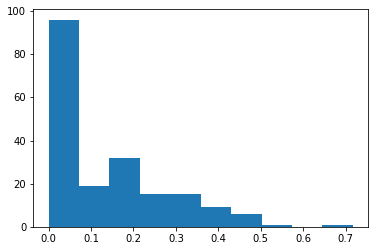

In [109]:
fig2, ax2 = plt.subplots()
ax2.hist(blacksents_df['pos'])
plt.show()

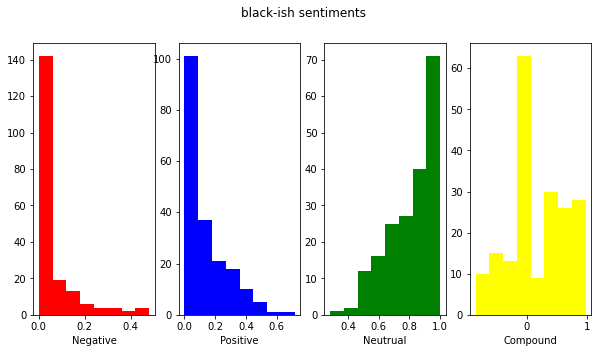

In [125]:
fig3, ax3 = plt.subplots(1, 4, figsize = (10,5))
ax3[0].hist(blacksents_df['neg'], bins =  8, color = 'red')
ax3[1].hist(blacksents_df['pos'], bins = 8, color = 'blue')
ax3[2].hist(blacksents_df['neu'], bins = 8, color = 'green')
ax3[3].hist(blacksents_df['compound'], bins = 8, color = 'yellow')

ax3[0].set_xlabel('Negative')
ax3[1].set_xlabel('Positive')
ax3[2].set_xlabel('Neutrual')
ax3[3].set_xlabel('Compound')

fig3.suptitle("black-ish sentiments")
plt.show()

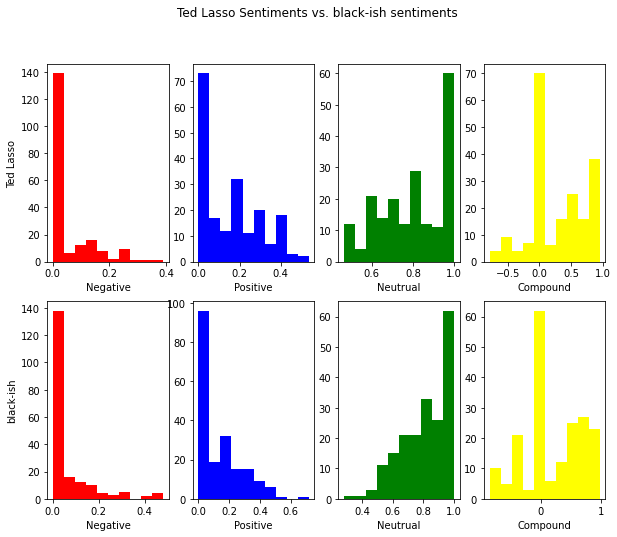

In [148]:
fig5, ax5 = plt.subplots(2, 4, figsize = (10, 8))
ax5[0,0].hist(sents_df['neg'], bins =  10, color = 'red')
ax5[0,1].hist(sents_df['pos'], bins =  10, color = 'blue')
ax5[0,2].hist(sents_df['neu'], bins =  10, color = 'green')
ax5[0,3].hist(sents_df['compound'], bins =  10, color = 'yellow')

ax5[0,0].set_xlabel("Negative")
ax5[0,1].set_xlabel("Positive")
ax5[0,2].set_xlabel("Neutrual")
ax5[0,3].set_xlabel("Compound")
ax5[0,0].set_ylabel("Ted Lasso")

ax5[1,0].hist(blacksents_df['neg'], bins =  10, color = 'red')
ax5[1,1].hist(blacksents_df['pos'], bins = 10, color = 'blue')
ax5[1,2].hist(blacksents_df['neu'], bins = 10, color = 'green')
ax5[1,3].hist(blacksents_df['compound'], bins = 10, color = 'yellow')

ax5[1,0].set_xlabel('Negative')
ax5[1,1].set_xlabel('Positive')
ax5[1,2].set_xlabel('Neutrual')
ax5[1,3].set_xlabel('Compound')
ax5[1,0].set_ylabel("black-ish")

fig5.suptitle("Ted Lasso Sentiments vs. black-ish sentiments")
plt.show()

I don't know where to go from here. I have the two shows next to each other but I don't think this is enough for my hypothesis. Should I overlap the two shows into one graph to show the difference of each sentiment? Or I was thinking of finding the average of each sentiment(if I have the time). Would a T test help in this situation?